In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")
mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'

train = pd.read_csv('/home/yahwang/elice/titanic_train.csv')

#  명목(범주형) 변수 Count 시각화

> ### Titanic 데이터를 활용
> ### Survived 컬럼 - 0 or 1을 가진 이항변수

## 컬럼별 단순 시각화

### 기본 - value_counts( )와 Series.plot 을 활용 ( NA 값은 자동으로 무시된다. )

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Survived')]

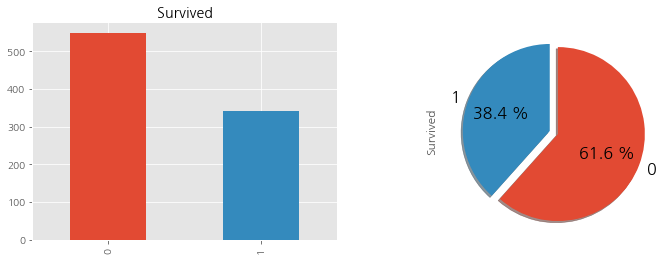

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
# bar plot
train.Survived.value_counts().plot(kind='bar', ax=axes[0])
# pie plot 
## autopct : 퍼센트 표시 format, textprops - fontsize : 폰트 크기 설정, ( startangle=90, counterclock=False가 올바른 시각화를 위한 기본 설정)
## explode : 특정 부분을 따로 분리 ( unique한 개수만큼 리스트 설정 ) - 0을 기준으로 값이 커질수록 원래 위치에서 멀어짐
train.Survived.value_counts().plot(kind='pie', explode=[0.1,0], autopct='%.1f %%', ax=axes[1], shadow=True, startangle=90, counterclock=False, textprops={'fontsize': 16})
axes[0].set(title='Survived', ylabel='')

### seaborn - countplot 활용

[Text(0.5, 1.0, '성별 정보')]

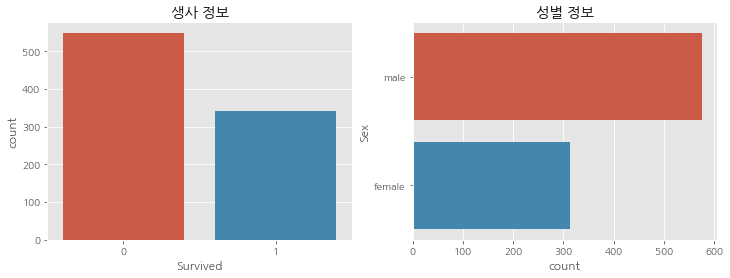

In [3]:
figure, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(12,4))
sns.countplot( x='Survived', data=train, ax=ax1) # x : 세로 bar
sns.countplot( y='Sex', data=train, ax=ax2) # y: 가로 bar
ax1.set(title="생사 정보")
ax2.set(title="성별 정보")

## 컬럼별 세분 시각화

### * 기본 - 시각화용 DataFrame을 만들어 DataFrame.plot을 활용한다.

In [4]:
# 조건 별 컬럼으로 이루어진 DataFrame 형태를 만들어서 plot한다. ( NA 값 무시 )
feature='Sex'
survived = train.query('Survived ==1')[feature].value_counts()
dead = train.query('Survived ==0')[feature].value_counts()
df = pd.DataFrame([survived, dead]) # df = pd.concat([survived, dead], axis=1).T 
df.index = ['Survived', 'Dead'] # DataFrame의 index로 조건에 맞는 String 값을 넣어준다.
df

,female,male
Survived,233,109
Dead,81,468


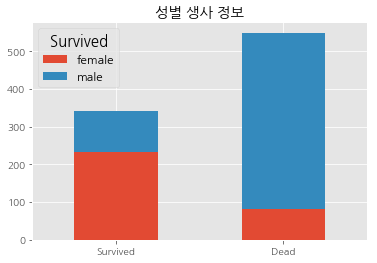

In [5]:
# X축이 index, Y축은 컬럼별 value, 다른 컬럼은 색깔로 구분한다.
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
df.plot(kind='bar', stacked=True, ax=ax)
ax.set(title="성별 생사 정보")
plt.setp(ax.get_xticklabels(), rotation=0)
ax.legend(title='Survived',loc=0,title_fontsize=15, fontsize=12)

#### 조건이 여러 개일 경우,

In [6]:
pclass_cabin = train[['Pclass','Cabin']].copy()
pclass_cabin.Cabin = pclass_cabin.Cabin.map(lambda x: x[0], na_action='ignore') # 데이터 전처리(앞 글자만 가져온다.)
df = pd.DataFrame() # 빈 데이터프레임 생성
class_index = {1:'1st class', 2:'2nd class', 3:'3rd class'} # index mapping을 위한 dict 생성
for class_num in sorted(pclass_cabin.Pclass.unique()): 
    # 조건별 데이터프레임 생성( 결과 DF의 row가 합치기 전 하나의 DF를 의미 )
    add_df = pclass_cabin.query('Pclass==@class_num').Cabin.value_counts().to_frame().T # Cabin의 value가 컬럼이 된다. 
    add_df.index = [class_index[class_num]] # dict를 활용한 index mapping
    df = pd.concat([df,add_df],sort=False) # 데이터프레임 결합 ( concat은 컬럼 개수가 달라도 결합 가능 )]
df

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3,NaN,NaN,5.0,4.0


[None, None, None, None, None, None]

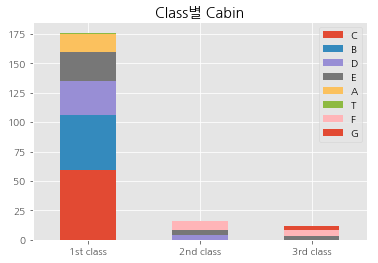

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
df.plot(kind='bar', stacked=True, ax=ax)
ax.set(title="Class별 Cabin")
plt.setp(ax.get_xticklabels(), rotation=0) # x축 표시값을 가로로 표시

### * seaborn - countplot, pointplot, catplot을 활용

#### countplot 
    hue : 해당 컬럼의 value 별로 자동으로 구분하여 출력 ( stacked 처리는 지원하지 않는다. )

[Text(0.5, 1.0, 'Pclass별 Cabin 정보')]

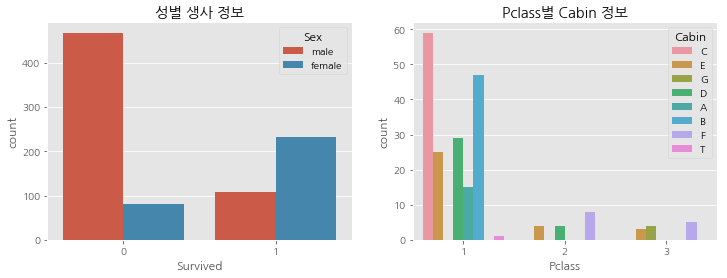

In [8]:
figure, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
sns.countplot(x='Survived', hue='Sex', data=train, ax=ax1) # Sex를 색깔로 구분
ax1.set(title="성별 생사 정보")
# 데이터 전처리 후 활용
pclass_cabin_2 = train[['Pclass','Cabin']].copy()
pclass_cabin_2.Cabin = pclass_cabin.Cabin.map(lambda x: x[0], na_action='ignore') # 데이터 전처리
sns.countplot(x='Pclass', hue='Cabin', data=pclass_cabin_2, ax=ax2) # Cabin을 색깔로 구분
ax2.set(title="Pclass별 Cabin 정보")

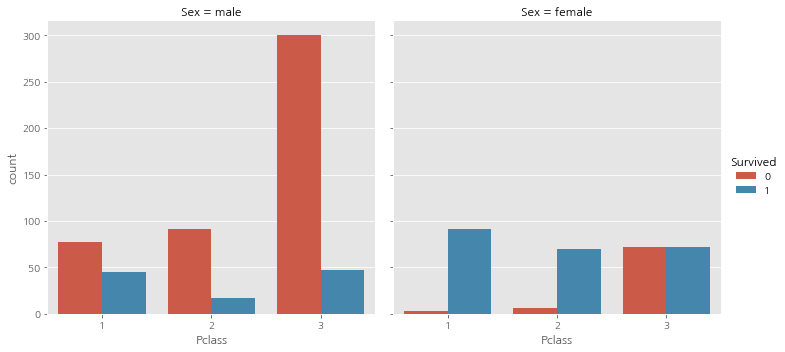

In [9]:
# catplot을 활용한 countplot
## col : value 별로 plot을 분리
sns.catplot(kind='count', x='Pclass', hue='Survived', data=train, col='Sex')

#### pointplot 
    - 평균값(추정값)과 신뢰구간을 표시한다.
    - 이항변수에 적용할 때 유용하다.

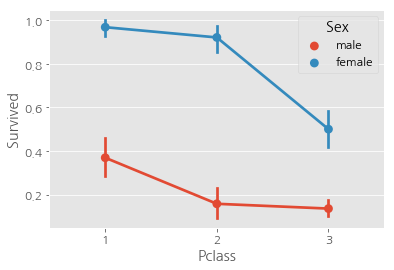

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train, ax=ax)

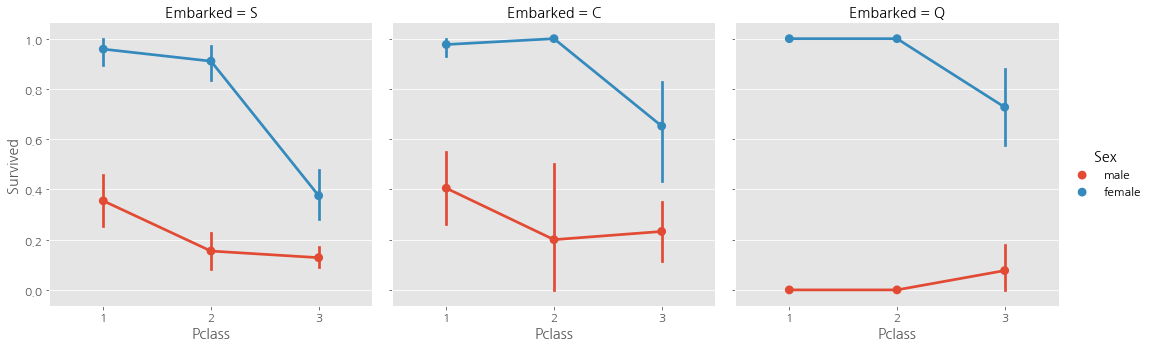

In [11]:
# col : value 별 새로운 plot 생성
sns.catplot(kind='point', x='Pclass', y='Survived', hue='Sex', data=train, col='Embarked')